# Data Preprocessing & Feature Engineering for Machine Learning¶

# California House Price Prediction

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## __First Inspection__

__What i do is__ :
* We check whether we have __missing value__ in this dataframe
* We check whether we have __duplicates__ or not in this case

In [8]:
df = pd.read_csv('housing.csv')

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


__Features__:

* **longitude:**  geographic coordinate (district´s east-west position) (0 - 180 degree east & west)
* **latitude:**  geographic coordinate (district´s north-south position) (0 - 90 degree north & south)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
df.loc[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


__Information__: 


We have __207 rows missing value__ in 'total_bedrooms' column

In [13]:
df.loc[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
df.median_income.value_counts()

3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: median_income, Length: 12928, dtype: int64

__What information can we get is:__
* And for instance, the average median age of houses is 28 years.
* And we have maximum populations actually 35000 persons in a district.
* And at the house values or the average median house value is 20.640 dollars.

In [16]:
df.describe(include= 'O')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


__What information can we get is:__ 
* Based on ocean proximity, houses less than 1 Hours to OCEAN is most frequent data 

In [17]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

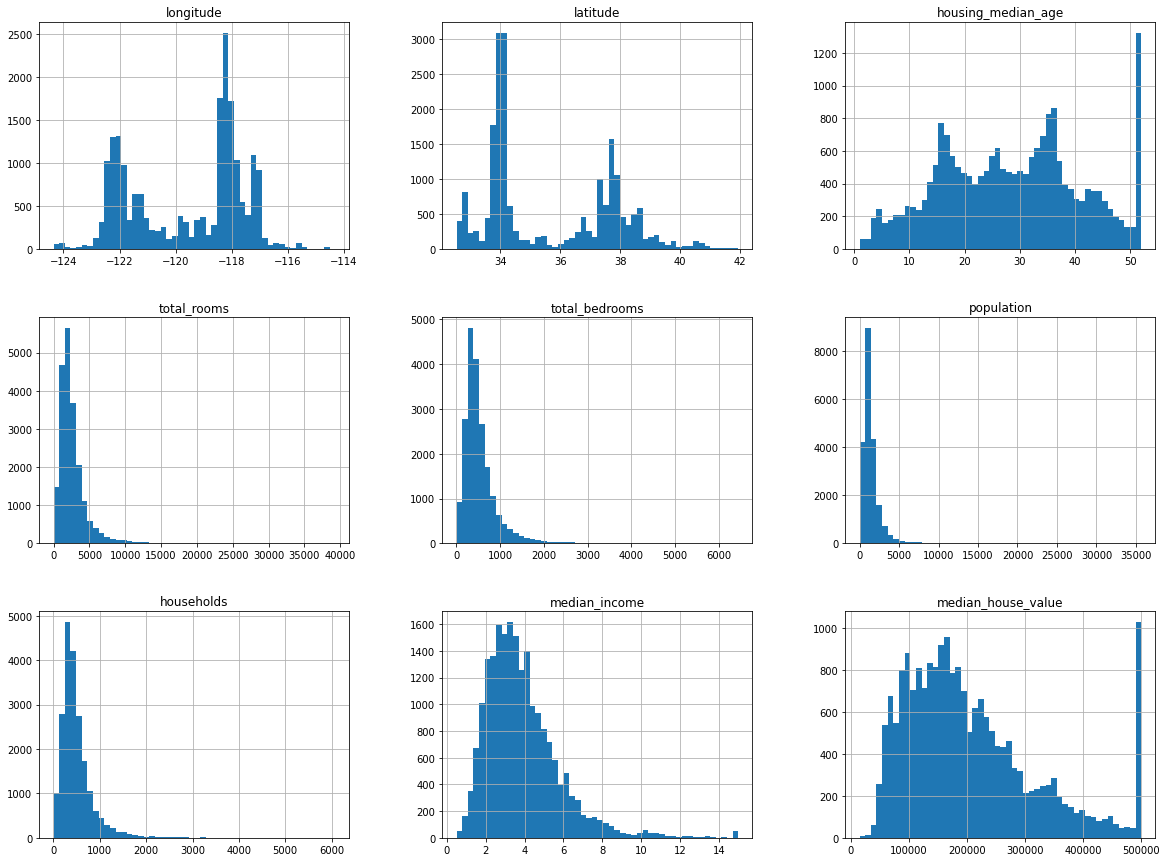

In [18]:
df.hist(bins=50, figsize=(20,15))
plt.show()

__What Information Can We Get Is:__
* In __household__ we can see that we have some extreme values here on the right hand side.we have very few districts where we have 5000 or even 6000 households.But actually the __typical value is maybe 200 or 300__
* In __housing_median_age__ we have the average number age of house in district is __50 year__
* In __the median house value__.And also this is kept to 50000. So this could cause problems later on.
* In __median income__ and this is between 0 and 15. So this is already scaled and we actually do not know the absolute numbers. So it could be __between 10.000 dollars and 100.000 dollars__ or whatsoever.
* Then we have the __population__ and typically there are around about a few hundred people in one district. But also here we have some outliers on the right side and also for __total bedrooms and total rooms.__

## Data Cleaning and Creating additional Features

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


__we have only a few missing values in one column.__
So it's the total bedrooms column.

In [20]:
df.total_bedrooms.isna().value_counts()

False    20433
True       207
Name: total_bedrooms, dtype: int64

There is 207 missing data in __total_bedrooms.__

In [21]:
df.dropna(inplace=True)

__the solution is :__

We decided to simply remove all Row districts with at least one missing value with a drop 

And this __wouldn't be an issue__ because we have only around about 207 of us missing values andin total we have over 20000 valid observations,.

__The Next Step What I Do Is:__

I have several features that that measure the size of the district, for instance, the total population,
the total number of households, and also the total number of bedrooms and rooms.

However, for our purposes, that could be a good idea to __combine those features and create new and
relative features.__

I could be interested in rooms per household and this is an indicator for the house size. And the intention behind this is pretty simple. __The larger the size, the higher the value.__



In [22]:
df['rooms_per_household']= df.total_rooms.div(df.households)

In [23]:
df.rooms_per_household.nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [24]:
df.rooms_per_household.nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

So we have value less than 1 and actually this doesn't really make sense. at least than one room per household.

In [25]:
 df.loc[[1914,1979, 5916, 8219]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,INLAND,141.909091
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,132.533333
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,0.846154
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,0.888889


__The Information That I Get Is:__ 
* __In index 1914__ we have only 11 households and almost total 2000 rooms, this is doesn't really make sense. this similar to __index 1979__

* __In index 5916__, here we have total 11 rooms and we have 13 households. And also here we have 32 rooms and 36 households. So this doesn't really make sense. at least 1 household for 1 room. This case similar to __index 8219__

So i could delete these observations, but this doesn't really make a difference.

In [26]:
df['pop_per_household']= df.population.div(df.households)

In [27]:
df['bedrooms_per_room']= df.total_bedrooms.div(df.total_rooms)

In [28]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096


In [29]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


__The Information That I Get Is:__
* on average, we have 5 rooms per household and 3 persons per household and 0 bedroom per room

## Which Factors Influence House Prices

__What I Do Is:__

Before we are going to create a machine learning model, we so deeply understand the data and identify the one or the other relationship between features and the label house prices

And there's no better way to do this than by creating informative graphs

While performing exploratory data 
analysis, We first explore the data and aim to find its probability distribution

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096


<AxesSubplot:>

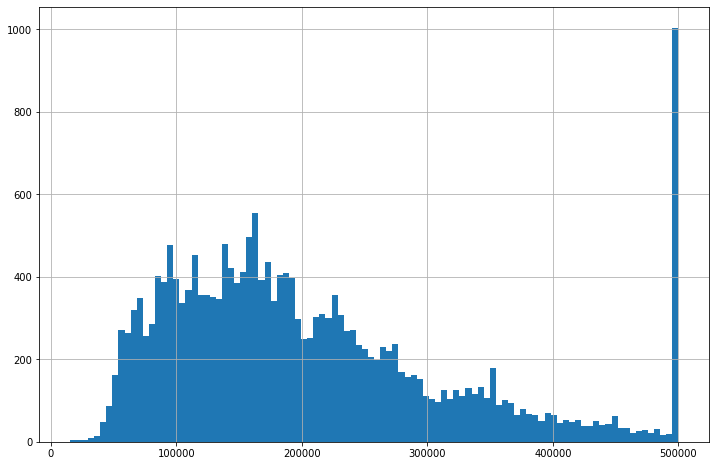

In [31]:
df.median_house_value.hist(bins=100, figsize=(12,8))

In [32]:
# identify linear relationship between house prices and the futures
# create correlation matrix beetwen house price and the features
df.corr().median_house_value.sort_values(ascending = False)

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
pop_per_household     -0.023639
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

__The Guide:__
* And actually, a correlation coefficient is between minus one that is a strong negative correlation or linear relationship between both random variables.

* And a correlation coefficient of one means that there's a strong positive linear relation.

*  And finally, a correlation coefficient of around about zero means that there's no linear relationship

__The Information What I Get Is:__
* We have clearly positive relationship between __median income and median house value__. So __the higher income__, the __more people can pay for the house.__
* We have postive relationship between __rooms per household and house price__ and this could be that __the large of the house, the higher the price.__
* Then we have two features indicating the size of the district, __total rooms__ and the total number of __households__. And there seems to be a positive relationship with the median house value. And one could argue that the larger districts have a better infrastructure. So in terms of shopping and so on, and __this could definitely influence house prices.__
* And also we have a positive relationship between the __housing_median_age and the median house value__, that could be definitely __influence house prices.__
* Next, that's no relation __between house price and household's, total bedrooms, population per household, and longitude.__  And this doesn't mean that there's no relationship at all, but at least there seems to be no linear relationship.
* We are faced strong negative relationship between __bedrooms per room and the house price.__ So the lower the bedrooms per room, the higher the house prices. And this means that the more non bedrooms we have in a house, the higher the price.

<AxesSubplot:>

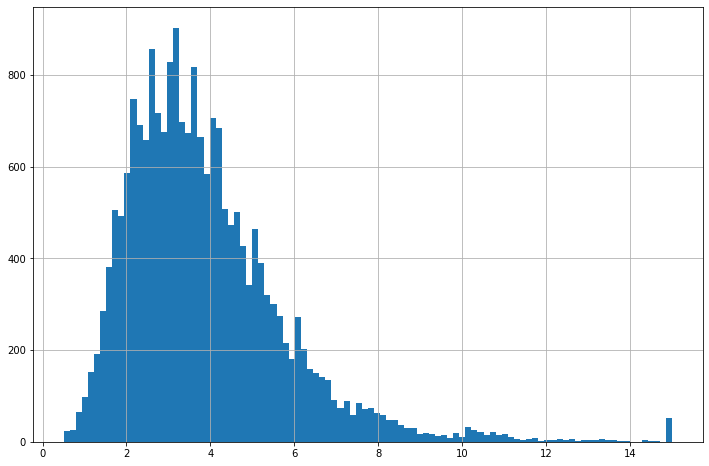

In [33]:
df.median_income.hist(bins= 100, figsize=(12,8))

__The Informatin What I Get Is:__
* The most frequent value is around about between two and four
* We have actually a cap at 15

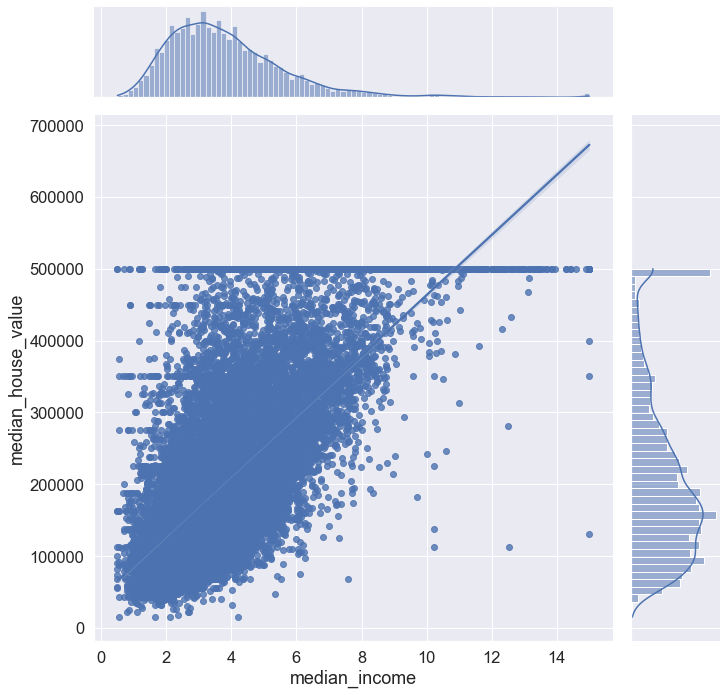

In [34]:
# Create Regression Plot with Linear Regression
sns.set(font_scale = 1.5)
sns.jointplot(data= df, x ='median_income', y='median_house_value', kind='reg', height=10)
plt.show()

__The Information What I Get Is:__
* We can see clearly that median house values are capped at 500.000
* We can also see that is a __strong positive linear relationship__ between house values and the income. __So the higher income, the higher the house prices.__

__Histogram results can vary wildly__ if you set different numbers of bins or simply change the start and end values of a bin. To overcome this, we can make use of the density function.

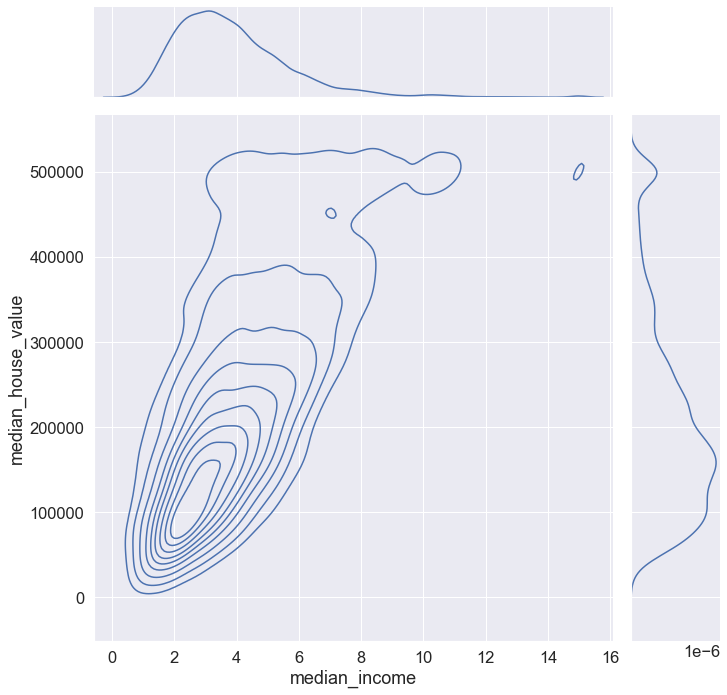

In [35]:
# Create Kernel Density Estimate
sns.set(font_scale=1.5)
sns.jointplot(data=df, x='median_income', y='median_house_value', kind='kde', height=10)
plt.show()

__The Information What I Get Is:__

We have __median income__ on the x axis and __median house value on the Y axis__, and we can see here the most frequent values that we can find most of the data points is an __income of two__ and __the house values around about 100000__. And also here we can see a positive linear relationship.

__And The Next Step What I Do Is:__

Creat a scatterplot with the plot method 
* on the x axis, i want to have the longitude, and on the y axis the latitude.
* I can also determine the size of the data points. And actually the size should be determined by the population.So the higher the population and then the district, the larger the data point.
* I can also define a color for the data points depending on the median house value. And I select the color map schoolmarm and we pass the truth with the color of parameter to create a color bar.

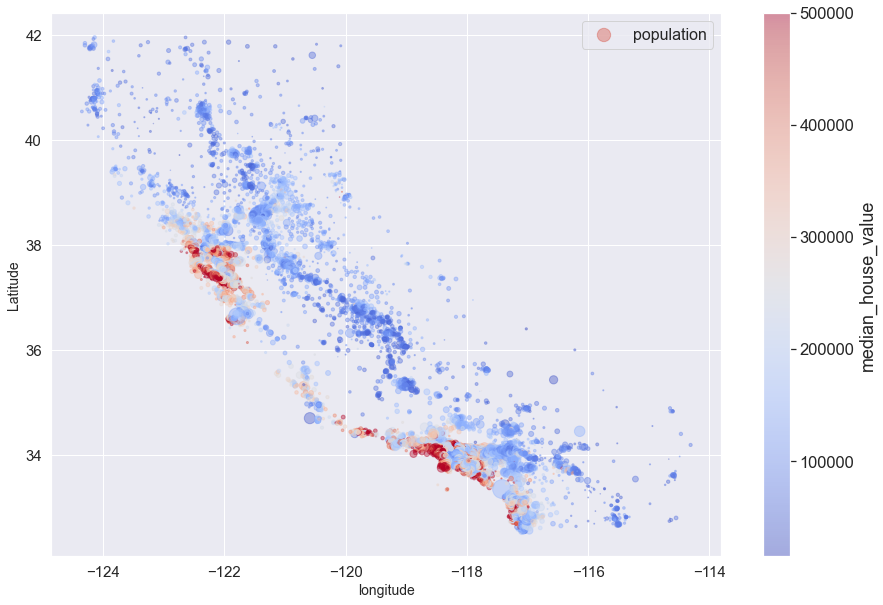

In [36]:
df.plot(kind='scatter', x='longitude', y='latitude', s=df.population/100, label='population',
        figsize=(15,10), c='median_house_value', cmap='coolwarm', colorbar = True,
        alpha=0.4, fontsize=15, sharex= False)
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('longitude', fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [37]:
import matplotlib.image as mpimg
california_img = mpimg.imread('california.png')

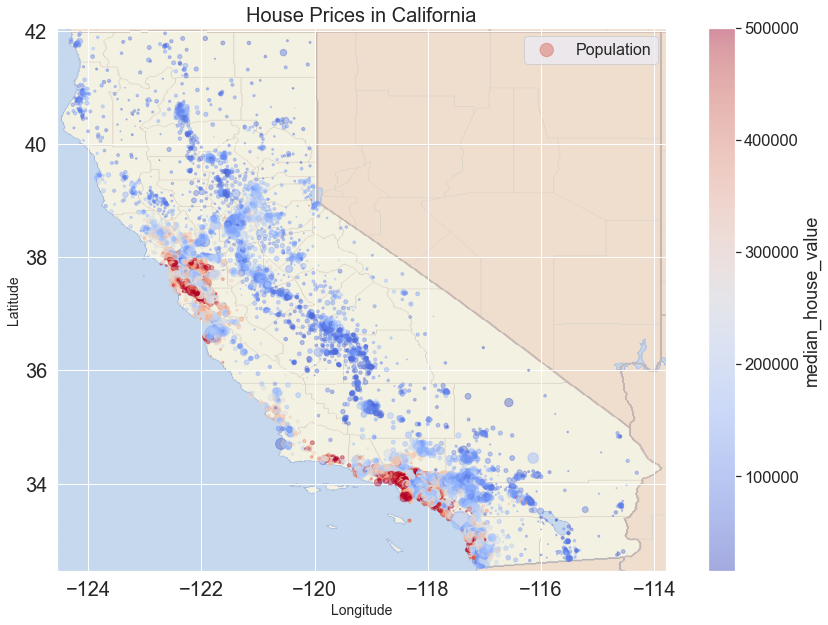

In [38]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False)
                      
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("House Prices in California", fontsize = 20)
plt.legend(fontsize=16)
plt.show()

__The Information :__
* the higher the population indicates house prices of around about 500000 and dark blue indicates the prices of around about 100000
* And can clearly see that __the more expensive houses and the more expensive districts are near the ocean__. So I think this is Los Angeles and San Francisco. And actually in the inland, the houses are getting more affordable with prices around about 100000.
* The north of the state almost pretty much doesn't have red spots, even near the ocean

In [39]:
# check unique value
prox = df.ocean_proximity.unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [40]:
# return data that ocean proximity == near ocean
df_NearOcean = df[ df.ocean_proximity == prox[3] ].copy()
df_NearOcean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,NEAR OCEAN,6.282110,2.887615,0.175246
1851,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN,5.589958,2.715481,0.206587
1852,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN,6.594990,2.803758,0.194998
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,NEAR OCEAN,5.349304,3.009274,0.208610
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0,NEAR OCEAN,4.906250,2.570312,0.227389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16.0,1316.0,194.0,450.0,173.0,10.1597,500001.0,NEAR OCEAN,7.606936,2.601156,0.147416
20381,-118.83,34.14,16.0,1956.0,312.0,671.0,319.0,6.4001,321800.0,NEAR OCEAN,6.131661,2.103448,0.159509
20423,-119.00,34.08,17.0,1822.0,438.0,578.0,291.0,5.4346,428600.0,NEAR OCEAN,6.261168,1.986254,0.240395
20424,-118.75,34.18,4.0,16704.0,2704.0,6187.0,2207.0,6.6122,357600.0,NEAR OCEAN,7.568645,2.803353,0.161877


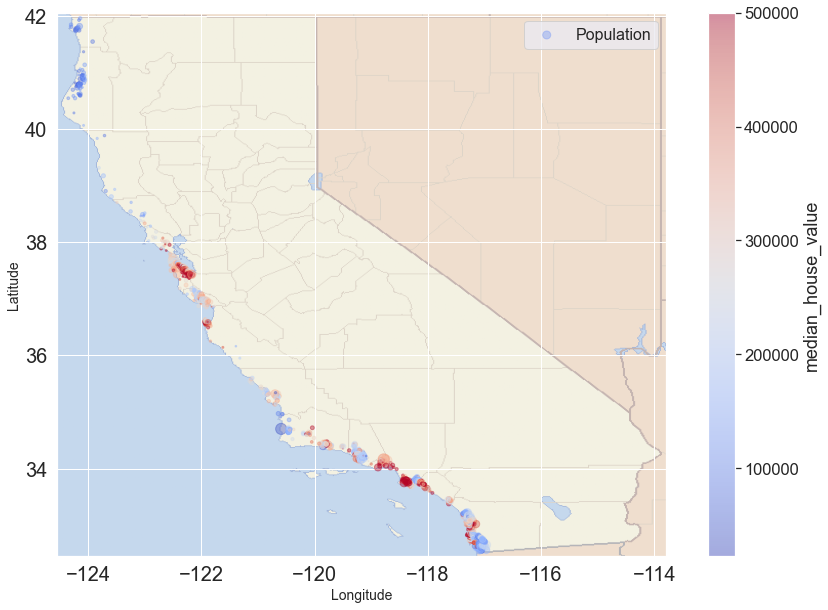

In [41]:
df_NearOcean.plot(kind="scatter", x="longitude", y="latitude",
                       s=df_NearOcean['population']/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

__The Information :__

if have a look here so can see that there shouldn't be a lienar relationship. Because based on this graph starting with high house price the next lower house price

## __Advanced Explanatory Data Analysis__

__What I Do Is:__

I have found out that the __income should be the most important feature__ to forecast house prices. And that's the kind of look at the median income.

In [42]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


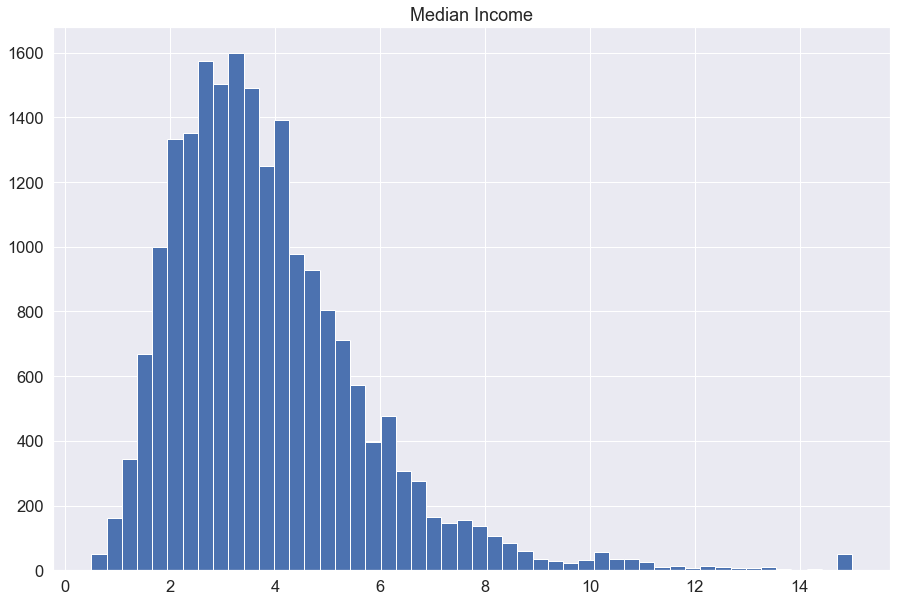

In [43]:
df.median_income.hist(bins=50, figsize=(15,10))
plt.title('Median Income')
plt.show()

In [44]:
df['income_category'] = pd.qcut( df.median_income, q=[0, 0.25, 0.5, 0.75, 0.95, 1],
       labels= [ 'Low', 'Below_Average', 'Above_Average', 'High', 'Very_High'])

In [45]:
df['income_category'].value_counts(normalize= True)

Low              0.250037
Above_Average    0.250037
Below_Average    0.249988
High             0.199922
Very_High        0.050017
Name: income_category, dtype: float64

Of the total data on median_income there are 5 categories, including 25% low, 25% Above Average, 24% Below Average, 19% High, and then 5% very high

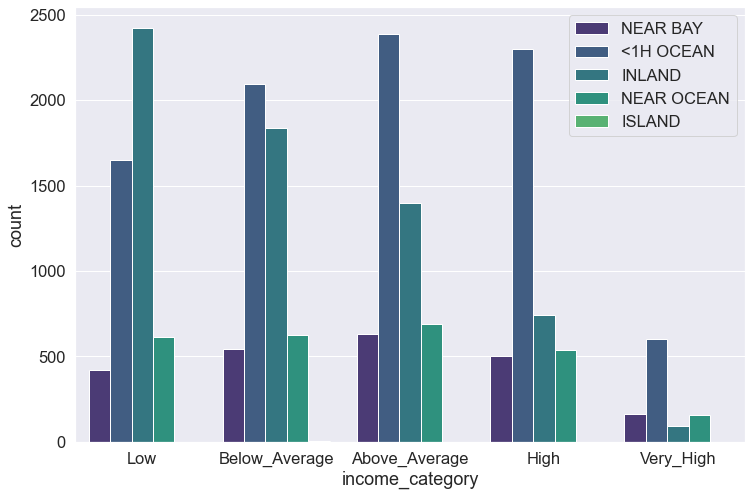

In [46]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette = 'viridis')
sns.countplot(data= df, x='income_category', hue= 'ocean_proximity', dodge=True)
plt.legend(loc = 1)
plt.show()

__The Information :__
* Districts with a low median income are mainly located in the inland.
* Districts with a below average income are mainly located in the less than one hour to the ocean increases
* High income category and districts with a very high median income, mainly located near the ocean or less than one hour.

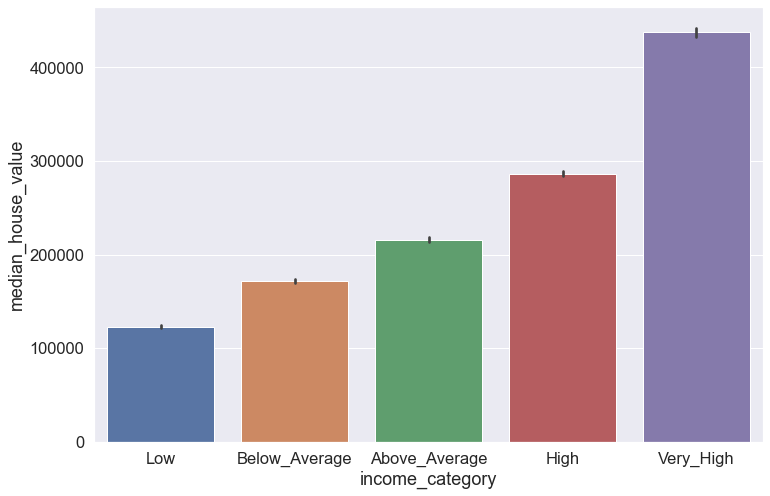

In [47]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.5)
sns.barplot(data = df, x = 'income_category', y = 'median_house_value', dodge = True)
plt.show()

__The Information :__
* The higher the median income in the district, the higher the median house value.
* So if you have a district with a low median income, then the average house value is around about 120000.
* And for the very high income category, we have an average median house value of around about 450000.

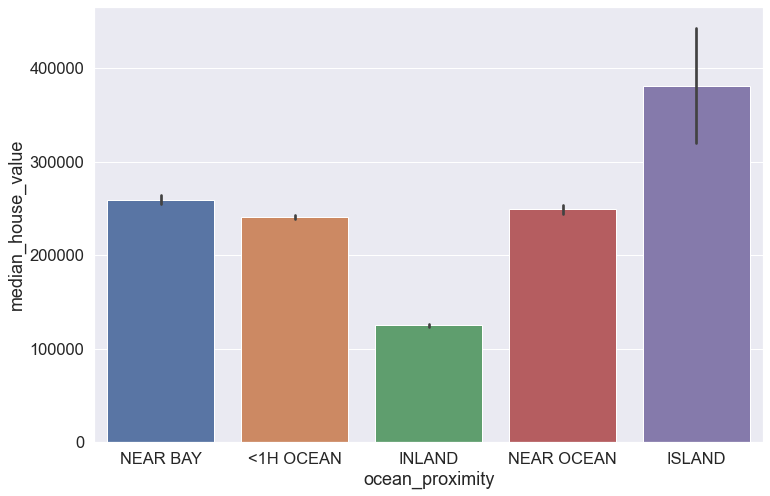

In [48]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
sns.barplot(data=df, x='ocean_proximity', y='median_house_value', dodge = True)
plt.show()

In [49]:
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

__The Information :__
* Igonore ISLAND because here have only five districts, so this is not really meaningful
* NEAR BAY, < 1 H OCEAN, and NEAR OCEAN very close together in terms of median house value
* Median house value in INLAND clearly lower than districts NEAR OCEAN

In [50]:
matrix = df.groupby( ['income_category', 'ocean_proximity']).median_house_value.mean().unstack().drop(columns = 'ISLAND')
matrix

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_category,,,,
Low,161337.076923,84820.626650,155122.052133,148027.826514
Below_Average,197236.013829,115124.088283,220196.177656,208665.190096
Above_Average,232278.358759,147846.891351,261965.251582,255293.813584
High,292208.766217,208095.566622,322566.033663,337446.227778
Very_High,439784.235489,347571.736842,451015.078788,468739.723270


In [51]:
type(matrix)

pandas.core.frame.DataFrame

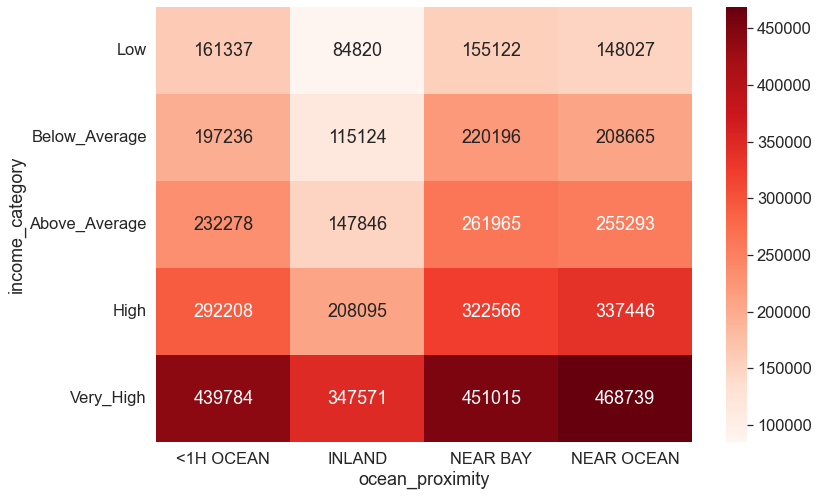

In [52]:
plt.figure( figsize=(12,8))
sns.set(font_scale = 1.5)
sns.heatmap(data=matrix.astype('int'), cmap='Reds', annot=True, fmt='d')
plt.show()

__The Information :__
* The Highest House Price find in the district a combination of 'Very High Income' and 'near the ocean' 
* The lowest House Price find in the distict a combination of 'the low income' and 'inland"'.
* There is no big difference house price between '< 1 H OCEAN' and 'NEAR OCEAN'

## Feature Engineering

__WHAT I DO :__

Feature engineering is the __pre-processing step of machine learning__, which __extracts features__ from raw data. It helps to represent an underlying problem to predictive models in a better way, which as a result, improve the accuracy of the model for unseen data.

In [53]:
label = df.median_house_value.copy()
label.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [54]:
features = df.drop(columns=['median_house_value'])
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,2.555556,0.146591,Very_High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,2.109842,0.155797,Very_High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,2.181467,0.172096,Above_Average


__The Problem 1 :__

* Typicall numerical features have different scales. for example, in column 'Population' and 'Median Income'. And actually many manchine learning alghoritmns dont perform well with different scales, and there should __normalize numerical features__. And because the features have data type float, so we will to normalize this data type

In [55]:
import scipy.stats as stats

In [56]:
# Z-score normalization refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1
feature1 = features.select_dtypes('float').apply(lambda x: stats.zscore(x))
feature1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-1.146024
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.987254
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-1.440514
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.492925
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.706141
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.199820
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.037412
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.036808
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.118204


__The Problem 2 :__

* Because machine learning cannot handle text data, so we have to transform text are categorical data into numbers

In [57]:
dummiesVar = pd.get_dummies(features.ocean_proximity)
dummiesVar

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [58]:
features= pd.concat([feature1, dummiesVar, df.income_category], axis=1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_category
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-1.146024,0,0,0,1,0,Very_High
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.987254,0,0,0,1,0,Very_High
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-1.440514,0,0,0,1,0,High
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.492925,0,0,0,1,0,High
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.706141,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.199820,0,1,0,0,0,Low
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.037412,0,1,0,0,0,Low
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.036808,0,1,0,0,0,Low
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.118204,0,1,0,0,0,Low


## Pre Processing Machine Learning

__What I Do:__

__Split the data into training and test data__, because the only way to know how well our model will generalize to new cases is to try it out on new cases.

And the next step is __train our machine learning model using the training set__. And then test the ability of our model to generalize and to forecast house prices for data points that our model has not seen before.

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_category
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-1.146024,0,0,0,1,0,Very_High
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.987254,0,0,0,1,0,Very_High
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-1.440514,0,0,0,1,0,High
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.492925,0,0,0,1,0,High
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.706141,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.199820,0,1,0,0,0,Low
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.037412,0,1,0,0,0,Low
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.036808,0,1,0,0,0,Low
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.118204,0,1,0,0,0,Low


In [61]:
# Create test data
X_test = features.sample(frac= 0.2, random_state=123)

__The Problem & The Solution:__

That is one drawback of a simple random sampling a so called __sampling bias__, and that means that __the sample is not representative of the whole dataset__.

In this case, the __median income__ is probably the most important feature. So that __the five income categories and training set and test set haave the same ratio as in the whole dataset__

In [62]:
# check the ratio test data
X_test['income_category'].value_counts(normalize=True)

# the result is actually equal or at least very close to the ratios in the whole dataset

Above_Average    0.252753
Below_Average    0.250795
Low              0.249082
High             0.196966
Very_High        0.050404
Name: income_category, dtype: float64

In [63]:
# drop category data type, because we dont use it
X_test.drop(columns = ["income_category"], inplace = True)

In [64]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14354,1.168283,-1.349636,-0.447373,-0.101365,0.273223,-0.132324,0.252600,-0.385554,-0.555535,-0.089315,0.989191,0,0,0,0,1
12908,-0.858142,1.402792,-0.367954,0.105937,-0.025798,-0.124382,-0.032524,-0.291148,0.184371,-0.041673,-0.505113,0,1,0,0,0
19545,-0.698423,0.934692,0.823326,-0.126534,0.164057,0.548944,0.276143,-1.140328,-0.616427,0.029885,0.761704,0,1,0,0,0
12188,1.108389,-0.909622,-1.400397,-0.644103,-0.716394,-0.744759,-0.809421,-0.404983,0.417690,-0.001307,-0.362407,1,0,0,0,0
14786,1.223186,-1.433894,-0.606210,-0.411174,-0.576377,-0.390006,-0.526913,0.503483,0.161454,0.021759,-0.746853,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,0.853838,-0.820683,-0.685629,0.613439,0.005054,0.406866,0.108730,1.428535,0.773237,0.039721,-1.332467,1,0,0,0,0
3614,0.579322,-0.652167,0.743907,-0.982285,-1.036774,-0.902722,-1.044844,-0.392873,-0.214003,0.090867,-0.119287,1,0,0,0,0
19296,-1.621794,1.295129,0.902745,-0.105483,-0.272609,-0.327350,-0.192088,0.007076,0.087214,-0.057229,-0.642076,1,0,0,0,0
5826,0.634225,-0.675572,1.855769,-0.426733,-0.619094,-0.599151,-0.621082,0.488320,0.431946,-0.021480,-0.870629,1,0,0,0,0


In [65]:
# create train data
X_train = features.loc[~features.index.isin(X_test.index)].copy()

In [66]:
# check ratio train data
X_train['income_category'].value_counts(normalize = True)

Low              0.250275
Below_Average    0.249786
Above_Average    0.249358
High             0.200661
Very_High        0.049920
Name: income_category, dtype: float64

In [67]:
# drop category data type, because we dont use it
X_train.drop(columns = ["income_category"], inplace = True)

In [68]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-1.146024,0,0,0,1,0
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.987254,0,0,0,1,0
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-1.440514,0,0,0,1,0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.492925,0,0,0,1,0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.706141,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.199820,0,1,0,0,0
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.037412,0,1,0,0,0
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.036808,0,1,0,0,0
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.118204,0,1,0,0,0


In [69]:
# shuffle train data
X_train.sample(frac=1, random_state=123)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9896,-1.342287,1.243638,-1.479816,-0.763084,-0.896756,-0.832124,-0.835579,1.426219,-0.019337,-0.037723,-0.826477,0,0,0,1,0
6749,0.744032,-0.713020,1.061582,-0.003892,-0.030544,0.060937,0.061646,0.039615,-0.163716,-0.020592,-0.228818,1,0,0,0,0
13825,1.208212,-0.539823,0.187977,-1.085249,-1.145941,-1.093336,-1.162556,-0.919398,-0.246955,0.029726,-0.094714,0,1,0,0,0
2842,0.294824,-0.109171,0.585070,-0.546172,-0.628587,-0.657395,-0.628930,-0.468113,0.056420,-0.042733,-0.411334,0,1,0,0,0
10112,0.813908,-0.792597,0.108558,-0.476156,-0.547898,-0.511787,-0.498139,0.336154,-0.107252,-0.032277,-0.356718,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,1.138336,-1.162396,-1.400397,-0.035010,-0.220399,-0.417362,-0.134540,0.100744,0.113957,-0.090681,-0.676265,0,0,0,0,1
1689,-1.342287,1.117251,-1.876909,0.553490,0.588857,0.554239,0.566498,0.619266,-0.024099,-0.019564,-0.149542,0,0,0,1,0
14698,1.238160,-1.330912,0.187977,-0.282583,-0.286848,-0.487960,-0.296721,-0.355279,-0.080863,-0.077837,-0.112121,0,0,0,0,1
19870,0.105159,0.326162,-1.400397,0.267477,0.187789,-0.065256,0.171510,-0.466902,0.108560,-0.065183,-0.370523,0,1,0,0,0


In [70]:
# create y test & y train data
y_test= label.loc[X_test.index]
y_train = label.loc[X_train.index]

In [71]:
y_test

14354    101800.0
12908    213000.0
19545     58800.0
12188    111300.0
14786    174100.0
           ...   
10262    272200.0
3614     175900.0
19296    215900.0
5826     326100.0
15383    291500.0
Name: median_house_value, Length: 4087, dtype: float64

In [72]:
y_train

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 16346, dtype: float64

## Training The ML Model [ Random Forest Regression ]

__What I Do is:__

Based on explanatory data analysis that there are important features that influence house prices in a __non linear way__. And the __location__ in terms of coordinates __is a really important feature for house prices__. However there's definetely __no linear relationship between latitude and longitude and house prices.__

So __i dont use a linear regression model__ and i should select model that can capture _non linear relationship and the random forest regress of such a model

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
forest_reg = RandomForestRegressor(random_state = 42, n_estimators = 500,
                                   max_features= "sqrt", max_depth= 75, min_samples_split=2)

In [75]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [76]:
forest_reg.score(X_train, y_train)

0.9759122337740102

In [77]:
forest_reg.score(X_test, y_test)

0.8240000686076716

__The Information :__
* This is a pretty high value, and this might __indicate__ that our __regress was actually overfitting__

So the next step is use __mean squared error__ to check wheter the our model it is the better fit, __the closer to zero, the better the fit.__

## Evaluating the model use the test set

In [78]:
from sklearn.metrics import mean_squared_error,r2_score

In [79]:
pred = forest_reg.predict(X_test)
pred

array([216290.804, 126791.2  ,  69091.6  , ..., 220057.8  , 318213.824,
       268497.2  ])

In [80]:
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47504.13463584635

In [81]:
comp = pd.DataFrame(data= {"True_V": y_test, "Pred":pred})
comp.abs()

,True_V,Pred
14354,101800.0,216290.804
12908,213000.0,126791.200
19545,58800.0,69091.600
12188,111300.0,182116.810
14786,174100.0,155987.802
...,...,...
10262,272200.0,294495.800
3614,175900.0,180974.400
19296,215900.0,220057.800
5826,326100.0,318213.824


__The Information:__

Some observations of for some districts, the difference is pretty high, in th first case, we have the the true median house price of 101.000 And actually the predicted value is 216.000

In [82]:
# calculate the  average difference between true & predict value
ae = comp.True_V.sub(comp.Pred).abs()
ae.mean()

31826.0213070712

__The Information__:
there is a __difference of over 30000 point__ between the predicted value and the actual value.

## Feature Importance

__What I Do Is:__

The random forest regression can give us the __relative importance of feature__ for the model with feature importances.

In [83]:
featureData = forest_reg.feature_importances_

In [84]:
feature_importance = pd.Series(data= featureData, index = X_train.columns).sort_values(ascending = False)

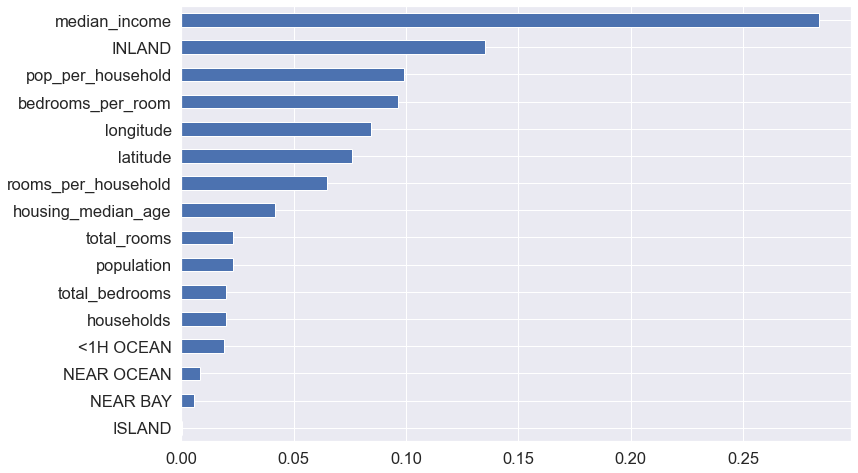

In [85]:
feature_importance.sort_values().plot.barh(figsize =(12,8))
plt.show()

__The Information:__
* So we can conclude that the question is whether the district is in the inland or near the ocean. And it doesn't really matter whether there's less than one hour to the ocean near the ocean and nearby our island

In [86]:
# drop category data type, because we dont use it
X_test.drop(columns = ['NEAR OCEAN', 'NEAR BAY', 'ISLAND', '<1H OCEAN'], inplace = True)
X_train.drop(columns = ['NEAR OCEAN', 'NEAR BAY', 'ISLAND', '<1H OCEAN'], inplace = True)

In [87]:
# create y test & y train data
y_test= label.loc[X_test.index]
y_train = label.loc[X_train.index]

In [88]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [89]:
forest_reg.score(X_train, y_train)

0.9753211894516108

In [90]:
pred2 = forest_reg.predict(X_test)
pred2

array([222026.602, 126029.   ,  70016.4  , ..., 215223.002, 317008.216,
       266544.4  ])

In [91]:
forest_mse = mean_squared_error(y_test, pred2)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

48101.918387340236

In [92]:
comp = pd.DataFrame(data= {"True_V": y_test, "Pred":pred2})
comp.abs()

,True_V,Pred
14354,101800.0,222026.602
12908,213000.0,126029.000
19545,58800.0,70016.400
12188,111300.0,187932.014
14786,174100.0,161096.602
...,...,...
10262,272200.0,296707.604
3614,175900.0,180024.604
19296,215900.0,215223.002
5826,326100.0,317008.216


In [93]:
# calculate the  average difference between true & predict value
ae = comp.True_V.sub(comp.Pred).abs()
ae.mean()

32321.27982578909

__The Information Is:__

After we drop many features and testing the score model againthe results obtained are not much different. So the features like *NEAR OCEAN, NEAR BAY, ISLAND, ETC* do not have big effect when its drop